Topic Analysis using LDA

In [3]:
#libraries
#libraries needed
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
## Download Once #run once and comment it out to avoid it downloading multiple times
#nltk.download('stopwords') 
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import string
import re
import textblob
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS
from emot.emo_unicode import UNICODE_EMOJI

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer() 

from wordcloud import ImageColorGenerator
from PIL import Image

import warnings
%matplotlib inline

In [20]:
#Importing libraries and loading data

import pandas as pd

tweetdata = pd.read_csv('sentiment.csv')

tweetdata.head()

,Unnamed: 0,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet
0,0,2022-11-01 23:59:59+00:00,1587595340760457218,https://twitter.com/loremipsum_2020/status/158...,loremipsum_2020,Twitter for iPhone,NaN,@GHOSTofSURF @ThatEricAlper Always on spot! 🤪,0,0
1,1,2022-11-01 23:59:59+00:00,1587595340458463233,https://twitter.com/grtamericanovel/status/158...,grtamericanovel,Twitter Web App,"Connecticut, USA",@GreenwaldEd @MadeInTheUSANJ @RepMTG If #GOP g...,2,1
2,2,2022-11-01 23:59:59+00:00,1587595339992731649,https://twitter.com/buildurlife/status/1587595...,buildurlife,Twitter for Android,BBB 🫧,Let's vote! We have a chance to give them more...,0,0
3,3,2022-11-01 23:59:59+00:00,1587595339783360513,https://twitter.com/MMayhem2020/status/1587595...,MMayhem2020,Twitter for iPhone,Red State USA,This is @KathyHochul NY. Get out and vote for ...,0,0
4,4,2022-11-01 23:59:59+00:00,1587595339653173258,https://twitter.com/trevormdale/status/1587595...,trevormdale,Twitter for Android,"Minnesota, USA",@tophat595 @KihneSheila Thanks democrats! You ...,1,0


Data Cleaning


In [21]:
tweetdata['location'] = tweetdata['location'].fillna('Unknown')

In [38]:
tweetdata.head(5)

,Unnamed: 0,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet,tweet_text_processed
0,0,2022-11-01 23:59:59+00:00,1587595340760457218,https://twitter.com/loremipsum_2020/status/158...,loremipsum_2020,Twitter for iPhone,Unknown,@GHOSTofSURF @ThatEricAlper Always on spot! 🤪,0,0,@GHOSTofSURF @ThatEricAlper Always on spot!
1,1,2022-11-01 23:59:59+00:00,1587595340458463233,https://twitter.com/grtamericanovel/status/158...,grtamericanovel,Twitter Web App,"Connecticut, USA",@GreenwaldEd @MadeInTheUSANJ @RepMTG If #GOP g...,2,1,@GreenwaldEd @MadeInTheUSANJ @RepMTG If #GOP g...
2,2,2022-11-01 23:59:59+00:00,1587595339992731649,https://twitter.com/buildurlife/status/1587595...,buildurlife,Twitter for Android,BBB 🫧,Let's vote! We have a chance to give them more...,0,0,Let's vote! We have a chance to give them more...
3,3,2022-11-01 23:59:59+00:00,1587595339783360513,https://twitter.com/MMayhem2020/status/1587595...,MMayhem2020,Twitter for iPhone,Red State USA,This is @KathyHochul NY. Get out and vote for ...,0,0,This is @KathyHochul NY. Get out and vote for ...
4,4,2022-11-01 23:59:59+00:00,1587595339653173258,https://twitter.com/trevormdale/status/1587595...,trevormdale,Twitter for Android,"Minnesota, USA",@tophat595 @KihneSheila Thanks democrats! You ...,1,0,@tophat595 @KihneSheila Thanks democrats! You ...


In [35]:
#Removing Emojis
import emoji
    
def give_emoji_free_text( text):
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.EMOJI_DATA]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
        
    return clean_text

In [47]:
tweetdata['tweet_text_processed'] = tweetdata['tweet'].apply(give_emoji_free_text)
tweetdata.head(5)

,Unnamed: 0,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet,tweet_text_processed
0,0,2022-11-01 23:59:59+00:00,1587595340760457218,https://twitter.com/loremipsum_2020/status/158...,loremipsum_2020,Twitter for iPhone,Unknown,@GHOSTofSURF @ThatEricAlper Always on spot! 🤪,0,0,@GHOSTofSURF @ThatEricAlper Always on spot!
1,1,2022-11-01 23:59:59+00:00,1587595340458463233,https://twitter.com/grtamericanovel/status/158...,grtamericanovel,Twitter Web App,"Connecticut, USA",@GreenwaldEd @MadeInTheUSANJ @RepMTG If #GOP g...,2,1,@GreenwaldEd @MadeInTheUSANJ @RepMTG If #GOP g...
2,2,2022-11-01 23:59:59+00:00,1587595339992731649,https://twitter.com/buildurlife/status/1587595...,buildurlife,Twitter for Android,BBB 🫧,Let's vote! We have a chance to give them more...,0,0,Let's vote! We have a chance to give them more...
3,3,2022-11-01 23:59:59+00:00,1587595339783360513,https://twitter.com/MMayhem2020/status/1587595...,MMayhem2020,Twitter for iPhone,Red State USA,This is @KathyHochul NY. Get out and vote for ...,0,0,This is @KathyHochul NY. Get out and vote for ...
4,4,2022-11-01 23:59:59+00:00,1587595339653173258,https://twitter.com/trevormdale/status/1587595...,trevormdale,Twitter for Android,"Minnesota, USA",@tophat595 @KihneSheila Thanks democrats! You ...,1,0,@tophat595 @KihneSheila Thanks democrats! You ...


In [48]:
# removing puntcuations 

tweetdata['tweet_text_processed'] = \
    tweetdata['tweet_text_processed'].map(lambda x: re.sub('[,\.!?]', '', x))

tweetdata.head(5)

,Unnamed: 0,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet,tweet_text_processed
0,0,2022-11-01 23:59:59+00:00,1587595340760457218,https://twitter.com/loremipsum_2020/status/158...,loremipsum_2020,Twitter for iPhone,Unknown,@GHOSTofSURF @ThatEricAlper Always on spot! 🤪,0,0,@GHOSTofSURF @ThatEricAlper Always on spot
1,1,2022-11-01 23:59:59+00:00,1587595340458463233,https://twitter.com/grtamericanovel/status/158...,grtamericanovel,Twitter Web App,"Connecticut, USA",@GreenwaldEd @MadeInTheUSANJ @RepMTG If #GOP g...,2,1,@GreenwaldEd @MadeInTheUSANJ @RepMTG If #GOP g...
2,2,2022-11-01 23:59:59+00:00,1587595339992731649,https://twitter.com/buildurlife/status/1587595...,buildurlife,Twitter for Android,BBB 🫧,Let's vote! We have a chance to give them more...,0,0,Let's vote We have a chance to give them more ...
3,3,2022-11-01 23:59:59+00:00,1587595339783360513,https://twitter.com/MMayhem2020/status/1587595...,MMayhem2020,Twitter for iPhone,Red State USA,This is @KathyHochul NY. Get out and vote for ...,0,0,This is @KathyHochul NY Get out and vote for @...
4,4,2022-11-01 23:59:59+00:00,1587595339653173258,https://twitter.com/trevormdale/status/1587595...,trevormdale,Twitter for Android,"Minnesota, USA",@tophat595 @KihneSheila Thanks democrats! You ...,1,0,@tophat595 @KihneSheila Thanks democrats You r...


In [49]:
# Convert the titles to lowercase
tweetdata['tweet_text_processed'] = \
    tweetdata['tweet_text_processed'].map(lambda x: x.lower())

tweetdata.head(5)

,Unnamed: 0,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet,tweet_text_processed
0,0,2022-11-01 23:59:59+00:00,1587595340760457218,https://twitter.com/loremipsum_2020/status/158...,loremipsum_2020,Twitter for iPhone,Unknown,@GHOSTofSURF @ThatEricAlper Always on spot! 🤪,0,0,@ghostofsurf @thatericalper always on spot
1,1,2022-11-01 23:59:59+00:00,1587595340458463233,https://twitter.com/grtamericanovel/status/158...,grtamericanovel,Twitter Web App,"Connecticut, USA",@GreenwaldEd @MadeInTheUSANJ @RepMTG If #GOP g...,2,1,@greenwalded @madeintheusanj @repmtg if #gop g...
2,2,2022-11-01 23:59:59+00:00,1587595339992731649,https://twitter.com/buildurlife/status/1587595...,buildurlife,Twitter for Android,BBB 🫧,Let's vote! We have a chance to give them more...,0,0,let's vote we have a chance to give them more ...
3,3,2022-11-01 23:59:59+00:00,1587595339783360513,https://twitter.com/MMayhem2020/status/1587595...,MMayhem2020,Twitter for iPhone,Red State USA,This is @KathyHochul NY. Get out and vote for ...,0,0,this is @kathyhochul ny get out and vote for @...
4,4,2022-11-01 23:59:59+00:00,1587595339653173258,https://twitter.com/trevormdale/status/1587595...,trevormdale,Twitter for Android,"Minnesota, USA",@tophat595 @KihneSheila Thanks democrats! You ...,1,0,@tophat595 @kihnesheila thanks democrats you r...


In [50]:
#remove URLs
def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

In [51]:
tweetdata['tweet_text_processed'] = tweetdata['tweet_text_processed'].apply(remove_URL)
tweetdata.head(5)

,Unnamed: 0,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet,tweet_text_processed
0,0,2022-11-01 23:59:59+00:00,1587595340760457218,https://twitter.com/loremipsum_2020/status/158...,loremipsum_2020,Twitter for iPhone,Unknown,@GHOSTofSURF @ThatEricAlper Always on spot! 🤪,0,0,@ghostofsurf @thatericalper always on spot
1,1,2022-11-01 23:59:59+00:00,1587595340458463233,https://twitter.com/grtamericanovel/status/158...,grtamericanovel,Twitter Web App,"Connecticut, USA",@GreenwaldEd @MadeInTheUSANJ @RepMTG If #GOP g...,2,1,@greenwalded @madeintheusanj @repmtg if #gop g...
2,2,2022-11-01 23:59:59+00:00,1587595339992731649,https://twitter.com/buildurlife/status/1587595...,buildurlife,Twitter for Android,BBB 🫧,Let's vote! We have a chance to give them more...,0,0,let's vote we have a chance to give them more ...
3,3,2022-11-01 23:59:59+00:00,1587595339783360513,https://twitter.com/MMayhem2020/status/1587595...,MMayhem2020,Twitter for iPhone,Red State USA,This is @KathyHochul NY. Get out and vote for ...,0,0,this is @kathyhochul ny get out and vote for @...
4,4,2022-11-01 23:59:59+00:00,1587595339653173258,https://twitter.com/trevormdale/status/1587595...,trevormdale,Twitter for Android,"Minnesota, USA",@tophat595 @KihneSheila Thanks democrats! You ...,1,0,@tophat595 @kihnesheila thanks democrats you r...


In [52]:
# Print out the first rows of papers
tweetdata['tweet_text_processed'].head()

0           @ghostofsurf @thatericalper always on spot
1    @greenwalded @madeintheusanj @repmtg if #gop g...
2    let's vote we have a chance to give them more ...
3    this is @kathyhochul ny get out and vote for @...
4    @tophat595 @kihnesheila thanks democrats you r...
Name: tweet_text_processed, dtype: object

Exploratory analysis 

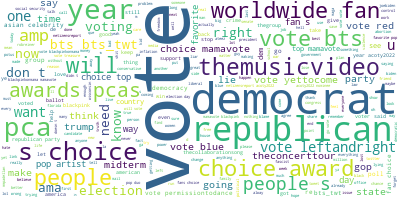

In [53]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(tweetdata['tweet_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

Preparing for LDA Analysis


In [54]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = tweetdata.tweet_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pdhiman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['ghostofsurf', 'thatericalper', 'always', 'spot']


In [55]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1)]


LDA Model TRainig


In [56]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.057*"vote" + 0.015*"democrats" + 0.012*"pcas" + 0.011*"people" + '
  '0.009*"year" + 0.008*"choice" + 0.008*"themusicvideo" + 0.007*"awards" + '
  '0.006*"republican" + 0.005*"like"'),
 (1,
  '0.038*"vote" + 0.018*"republican" + 0.013*"democrats" + 0.010*"party" + '
  '0.006*"day" + 0.006*"amp" + 0.006*"get" + 0.005*"election" + '
  '0.005*"bts_twt" + 0.005*"one"'),
 (2,
  '0.040*"vote" + 0.017*"democrats" + 0.014*"republican" + 0.009*"people" + '
  '0.006*"bts_twt" + 0.005*"amas" + 0.005*"favorite" + 0.005*"pop" + '
  '0.005*"voting" + 0.005*"right"'),
 (3,
  '0.079*"vote" + 0.012*"pcas" + 0.011*"democrats" + 0.010*"bts" + '
  '0.008*"year" + 0.008*"blue" + 0.008*"bts_twt" + 0.007*"mamavote" + '
  '0.007*"people" + 0.005*"amas"'),
 (4,
  '0.042*"vote" + 0.020*"democrats" + 0.012*"mamavote" + 0.011*"choice" + '
  '0.011*"people" + 0.011*"republican" + 0.009*"pcas" + 0.006*"year" + '
  '0.006*"worldwide" + 0.006*"bts"'),
 (5,
  '0.030*"vote" + 0.012*"republican" + 0.008*"democ

Analysis LDA Model Results

In [61]:
#import pyLDAvis.gensim
import pyLDAvis.gensim_models 
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

c:\Users\pdhiman\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.049675 -0.010097       1        1  14.463092
3      0.013233  0.056676       2        1  13.579737
0      0.008286 -0.006331       3        1  13.540845
9      0.037596  0.004212       4        1  10.386754
8      0.029731  0.049723       5        1   9.975175
6      0.077465 -0.014415       6        1   9.731423
2     -0.049698  0.007053       7        1   9.315226
4      0.039255 -0.028860       8        1   7.777296
7     -0.029077 -0.097948       9        1   5.720370
5     -0.077115  0.039988      10        1   5.510082, topic_info=          Term         Freq        Total Category  logprob  loglift
409  worldwide   857.000000   857.000000  Default  30.0000  30.0000
210     choice  1762.000000  1762.000000  Default  29.0000  29.0000
193   mamavote  1508.000000  1508.000000  Default  28.0000  28.0000
407        fan   653.000000   653.000000  Default  27.0000  27.0000
179       pcas  2076.000000  2076.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
209        bts    37.993005  1353.973283  Topic10  -5.8182  -0.6748
193   mamavote    38.620831  1508.095201  Topic10  -5.8018  -0.7662
14         gop    30.043373   576.305893  Topic10  -6.0529  -0.0554
967        pop    29.463885   557.816035  Topic10  -6.0724  -0.0423
142      would    29.669673   661.128087  Topic10  -6.0654  -0.2052

[839 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
16404     10  0.727133  aaaaaaaa
9532       1  0.653193     abort
9532       4  0.093313     abort
9532       5  0.093313     abort
9532       7  0.093313     abort
...      ...       ...       ...
25902      3  0.674499     ラウィット
6352       9  0.743075       票てす
11384      4  0.743268        너무
30353      4  0.809878        조식
26247      3  0.671276        채영

[2316 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 10, 9, 7, 3, 5, 8, 6])